In [9]:
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
import atlite
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import country_converter as coco
import atlite
import numpy as np
from urllib.request import urlretrieve

In [13]:
fn = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgadm&files=gadm_410-levels-ADM_1-DEU.gpkg"
regions = gpd.read_file(fn)

c:\Users\Sherry\anaconda3\envs\esm-ws-24-25\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: File /vsimem/pyogrio_a28c3f1f7c254e1683dd137c31c03e4e has GPKG application_id, but non conformant file extension
  return ogr_read(


In [20]:
url = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fmarineregions%2FWorld_EEZ_v11_20191118_gpkg&files=eez_v11.gpkg"


# Load the GeoPackage
marine_regions = gpd.read_file(url)

# Check the data
print(marine_regions.head())

c:\Users\Sherry\anaconda3\envs\esm-ws-24-25\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: File /vsimem/pyogrio_6734bcbae0854262b95a317510b2a01c has GPKG application_id, but non conformant file extension
  return ogr_read(


    MRGID                                            GEONAME  MRGID_TER1  \
0  8444.0             American Samoa Exclusive Economic Zone      8670.0   
1  8379.0                  Ascension Exclusive Economic Zone      8620.0   
2  8446.0               Cook Islands Exclusive Economic Zone      8672.0   
3  8389.0  Overlapping claim Falkland / Malvinas Islands:...      8623.0   
4  8440.0          French Polynesian Exclusive Economic Zone      8656.0   

            POL_TYPE  MRGID_SOV1                   TERRITORY1 ISO_TER1  \
0              200NM      2204.0               American Samoa      ASM   
1              200NM      2208.0                    Ascension      SHN   
2              200NM      2227.0                 Cook Islands      COK   
3  Overlapping claim      2208.0  Falkland / Malvinas Islands      FLK   
4              200NM        17.0             French Polynesia      PYF   

       SOVEREIGN1  MRGID_TER2  MRGID_SOV2  ... ISO_SOV1 ISO_SOV2 ISO_SOV3  \
0   United States    

In [22]:
print(marine_regions.columns)

Index(['MRGID', 'GEONAME', 'MRGID_TER1', 'POL_TYPE', 'MRGID_SOV1',
       'TERRITORY1', 'ISO_TER1', 'SOVEREIGN1', 'MRGID_TER2', 'MRGID_SOV2',
       'TERRITORY2', 'ISO_TER2', 'SOVEREIGN2', 'MRGID_TER3', 'MRGID_SOV3',
       'TERRITORY3', 'ISO_TER3', 'SOVEREIGN3', 'X_1', 'Y_1', 'MRGID_EEZ',
       'AREA_KM2', 'ISO_SOV1', 'ISO_SOV2', 'ISO_SOV3', 'UN_SOV1', 'UN_SOV2',
       'UN_SOV3', 'UN_TER1', 'UN_TER2', 'UN_TER3', 'geometry'],
      dtype='object')


In [ ]:
url = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fmarineregions%2FWorld_EEZ_v11_20191118_gpkg&files=eez_v11.gpkg"


# Load the GeoPackage
marine_regions = gpd.read_file(url)

# Check the data
germany_gdf = marine_regions[marine_regions['SOVEREIGN1'] == 'Germany']

c:\Users\Sherry\anaconda3\envs\esm-ws-24-25\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: File /vsimem/pyogrio_25b5f573ec654a66a614550360ff6c03 has GPKG application_id, but non conformant file extension
  return ogr_read(


      MRGID                         GEONAME  MRGID_TER1 POL_TYPE  MRGID_SOV1  \
217  5669.0  German Exclusive Economic Zone      2101.0    200NM      2101.0   

    TERRITORY1 ISO_TER1 SOVEREIGN1  MRGID_TER2  MRGID_SOV2  ... ISO_SOV1  \
217    Germany      DEU    Germany         0.0         0.0  ...      DEU   

    ISO_SOV2 ISO_SOV3  UN_SOV1  UN_SOV2 UN_SOV3 UN_TER1 UN_TER2  UN_TER3  \
217     None     None      276      NaN     NaN   276.0     NaN      NaN   

                                              geometry  
217  MULTIPOLYGON (((14.09923 53.86999, 14.11579 53...  

[1 rows x 32 columns]


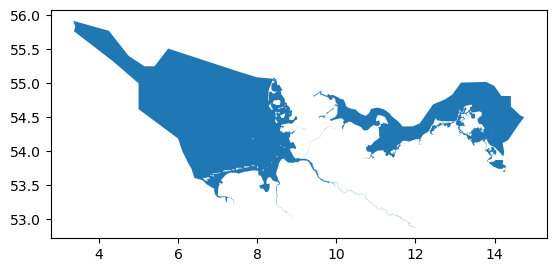

In [25]:
germany_gdf.plot()
print(germany_gdf)

  GID_0    GID_1  COUNTRY             NAME_1  \
0   DEU  DEU.1_1  Germany  Baden-Württemberg   
1   DEU  DEU.2_1  Germany             Bayern   
2   DEU  DEU.3_1  Germany             Berlin   
3   DEU  DEU.4_1  Germany        Brandenburg   
4   DEU  DEU.5_1  Germany             Bremen   

                                            geometry  
0  MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...  
1  MULTIPOLYGON (((11.41009 47.4954, 11.41005 47....  
2  MULTIPOLYGON (((13.50022 52.61379, 13.49855 52...  
3  MULTIPOLYGON (((13.3222 51.43674, 13.32402 51....  
4  MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1...  
16


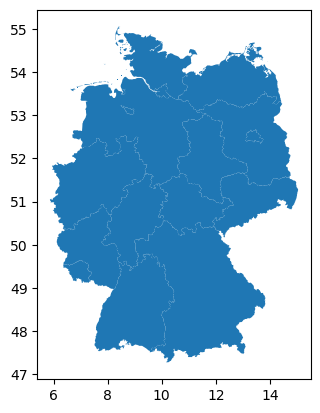

In [10]:
regions.plot()
print(regions.head())


print(len(np.unique(regions["NAME_1"])))

<Axes: >

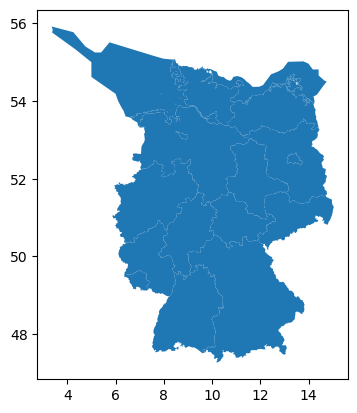

In [35]:
new_row_data = {
    "GID_0": "DEU",                     
    "GID_1": "DEU.17_1",               
    "COUNTRY": "Germany",                
    "NAME_1": germany_gdf["GEONAME"].iloc[0],                
}

new_row_geometry =  germany_gdf["geometry"].iloc[0]

new_row = gpd.GeoDataFrame([new_row_data], geometry=[new_row_geometry], crs=regions.crs)

germany_merged = pd.concat([regions, new_row], ignore_index=True)

germany_merged.plot()

In [43]:
print(germany_merged.tail())

   GID_0     GID_1  COUNTRY                          NAME_1  \
12   DEU  DEU.14_1  Germany                         Sachsen   
13   DEU  DEU.13_1  Germany                  Sachsen-Anhalt   
14   DEU  DEU.15_1  Germany              Schleswig-Holstein   
15   DEU  DEU.16_1  Germany                       Thüringen   
16   DEU  DEU.17_1  Germany  German Exclusive Economic Zone   

                                             geometry  \
12  MULTIPOLYGON (((12.35469 50.24796, 12.35507 50...   
13  MULTIPOLYGON (((12.24043 50.9621, 12.24105 50....   
14  MULTIPOLYGON (((10.51093 53.37207, 10.50681 53...   
15  MULTIPOLYGON (((11.25325 50.27047, 11.25328 50...   
16  MULTIPOLYGON (((14.09923 53.86999, 14.11579 53...   

                     centroid  group  
12  POINT (13.34857 51.05233)    3.0  
13  POINT (11.70068 52.01318)    4.0  
14   POINT (9.81008 54.18288)    4.0  
15  POINT (11.02488 50.90387)    4.0  
16    POINT (8.3944 54.55354)    5.0  


In [46]:
print(germany_merged["NAME_1"])

0                  Baden-Württemberg
1                             Bayern
2                             Berlin
3                        Brandenburg
4                             Bremen
5                            Hamburg
6                             Hessen
7             Mecklenburg-Vorpommern
8                      Niedersachsen
9                Nordrhein-Westfalen
10                   Rheinland-Pfalz
11                          Saarland
12                           Sachsen
13                    Sachsen-Anhalt
14                Schleswig-Holstein
15                         Thüringen
16    German Exclusive Economic Zone
Name: NAME_1, dtype: object


In [70]:
from matplotlib import colors
import matplotlib.colors as mcolors

# Step 1: Initialize a 'group' column with None or empty values
germany_merged['group'] = None

# Step 2: Manually assign each region (GID_1) to one of the 6 groups
groups = {
    1: ["DEU.9_1", "DEU.5_1", "DEU.6_1", "DEU.15_1"],  # Group 1 regions
    2: ["DEU.8_1", "DEU.3_1", "DEU.4_1"],  # Group 2 regions
    3: ["DEU.13_1", "DEU.16_1", "DEU.14_1"],  # Group 3 regions
    4: ["DEU.10_1", "DEU.11_1", "DEU.12_1", "DEU.7_1"],  # Group 4 regions
    5: ["DEU.2_1", "DEU.1_1"],  # Group 5
    6: ["DEU.17_1"]  # Group 6 (Economic Zone / Sea Area)
}

# Step 3: Assign the 'group' number based on the GID_1 value
for group, gid_values in groups.items():
    for gid in gid_values:
        germany_merged.loc[germany_merged['GID_1'] == gid, 'group'] = group

#Merge the geometries based on the group
merged_geometries = germany_merged.groupby('group').geometry.apply(lambda x: x.unary_union)

# Step 5: Create a new GeoDataFrame with the merged geometries
# After groupby operation, we need to keep track of the 'group' column.
merged_gdf = gpd.GeoDataFrame(merged_geometries, columns=['geometry'], crs=germany_merged.crs)

# Add the 'group' column to merged_gdf for plotting purposes
merged_gdf['group'] = merged_geometries.index  # The index now represents the 'group' value




C:\Users\Sherry\AppData\Local\Temp\ipykernel_22832\2189847852.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geometries = germany_merged.groupby('group').geometry.apply(lambda x: x.unary_union)


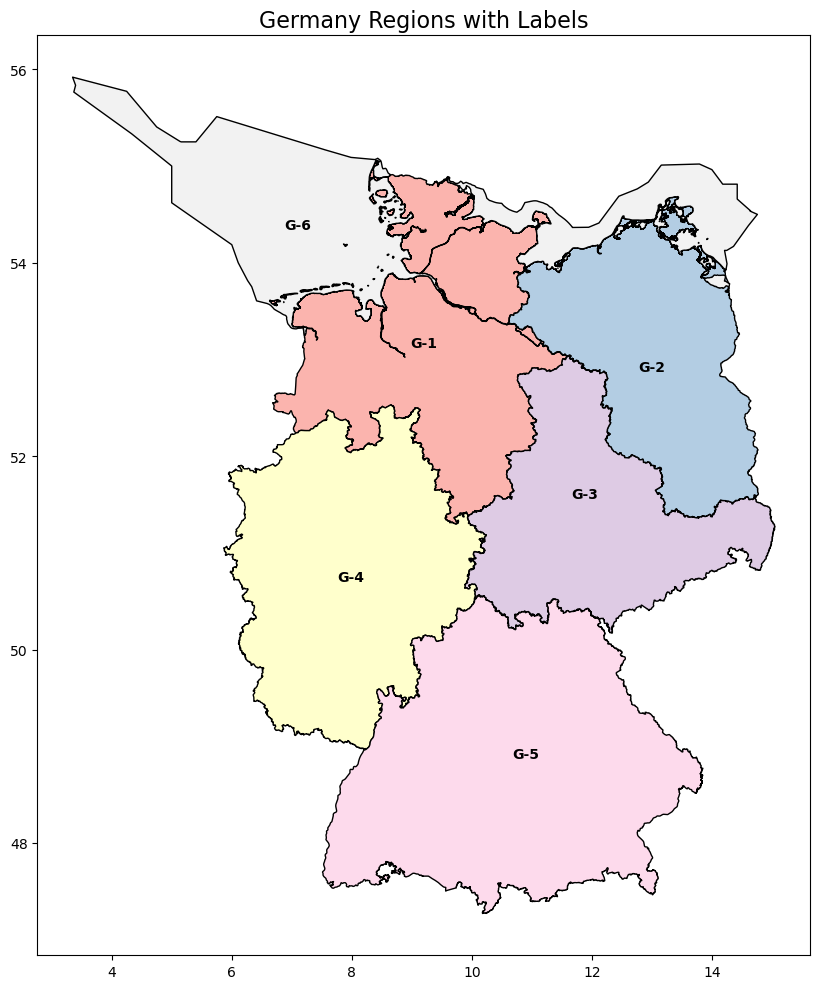

In [71]:
# Step 6: Plot the merged regions with labels
fig, ax = plt.subplots(figsize=(10, 10))

# Use the 'column' argument in plot() to color by 'group'
merged_gdf.plot(ax=ax, column='group', legend=False, edgecolor='black', cmap='Pastel1')

# Step 7: Add text labels to each group using representative_point
for idx, row in merged_gdf.iterrows():
    # Use the representative point as the label location
    representative_point = row['geometry'].representative_point()
    region_label = f'G-{row["group"]}'
    ax.text(representative_point.x, representative_point.y, region_label, ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Step 8: Add title and show plot
plt.title("Germany Regions with Labels", fontsize=16)
plt.axis('on')
plt.tight_layout()

# Show plot
plt.show()